Nama: Gisella Vania Dwipayana

Participant ID: DS04042

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 5.5 MB/s eta 0:00:00


In [4]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 10.

In [5]:
!gdown 1LrCqcbr-rg-e5KA0y-XxcFBkdAFG0z0o

Downloading...
From: https://drive.google.com/uc?id=1LrCqcbr-rg-e5KA0y-XxcFBkdAFG0z0o
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 30.4MB/s]


Features description:
- age: umur pasien (dalam satuan tahun)
- sex: jenis kelamin pasien (1 jika pria, 0 jika wanita)
- cp: jenis nyeri dada atau chest pain yang dialami pasien (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
- trestbps: tekanan darah istirahat (dalam satuan mm Hg)
- chol: serum cholestoral dalam satuan mg/dl
- fbs: (gula darah puasa > 120 mg/dl) (1 = true; 0 = false)
- restecg: hasil elektrokardiografi saat istirahat (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: detak jantung maksimum yang tercapai
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- slope: kemiringan segmen ST saat puncak olahraga (Value 0: menaik, Value 1: datar, Value 2: menurun)
- ca: jumlah pembuluh utama (0-3) diwarnai oleh flourosopy
- thal: 1 = normal; 2 = fixed defect; 3 = reversable defect


In [6]:
# import data
data = pd.read_csv('heart.csv')

In [7]:
# cek head dari data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# cek missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

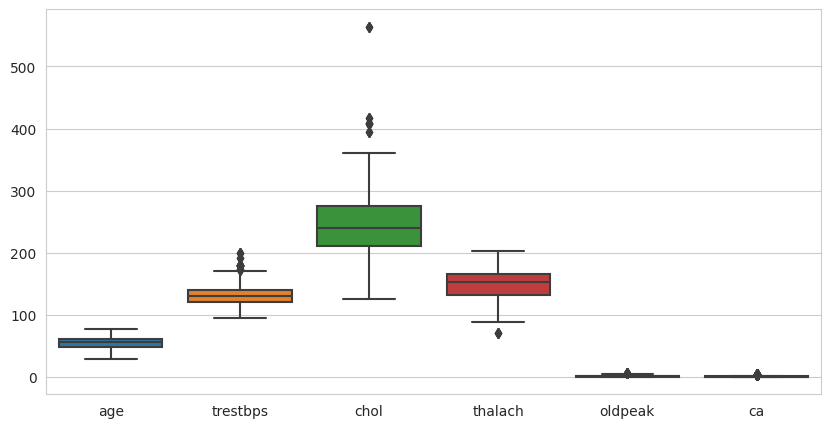

In [10]:
# menampilkan boxplot dari fitur-fitur numerik untuk mengecek outlier
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])

Terlihat dari boxplot diatas bahwa terdapat outlier pada dataset yang digunakan

In [11]:
# Menghapus outliers
def outliers(data, fitur):
  Q1 = data[fitur].quantile(0.25)
  Q3 = data[fitur].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  ls = data.index[(data[fitur] < lower_bound) | (data[fitur] > upper_bound)]
  return ls

index_list = []
for ft in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  index_list.extend(outliers(data, ft))

data.drop(index_list, axis=0, inplace=True)

<Axes: >

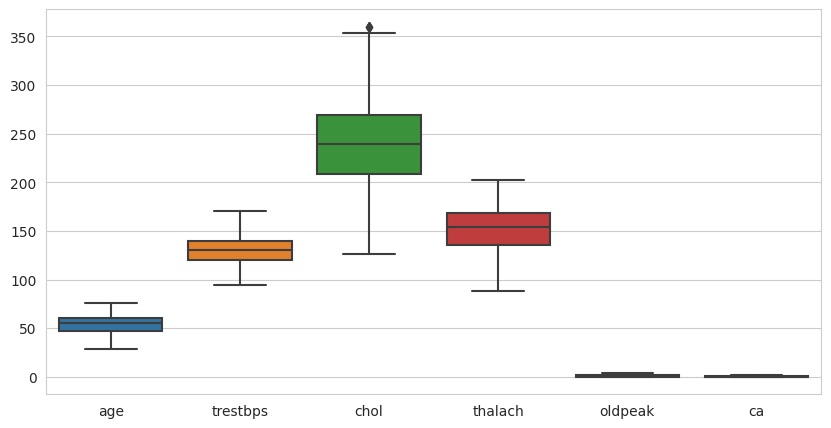

In [12]:
# menampilkan boxplot dari fitur-fitur numerik untuk mengecek outlier
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])

<Axes: xlabel='target', ylabel='count'>

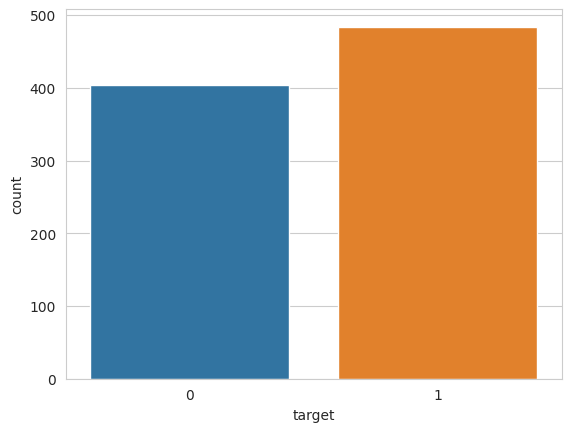

In [13]:
# Menampilkan jumlah data per target class 
sns.set_style('whitegrid')
sns.countplot(x=data['target'])

Dari countplot diatas terlihat bahwa data imbalance dimana banyaknya pasien dengan fitur target 1 (memiliki penyakit jantung) lebih banyak dibandingkan banyaknya pasien dengan fitur target 0 (tidak memiliki penyakit jantung)

In [14]:
# Descriptive statistics of the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,53.856982,0.698198,0.976351,129.448198,241.755631,0.130631,0.531532,150.472973,0.327703,0.979955,1.420045,0.524775,2.293919,0.545045
std,8.999238,0.459298,1.036266,15.329144,44.456127,0.337186,0.514850,22.567233,0.469640,1.050679,0.608400,0.725952,0.619385,0.498247
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


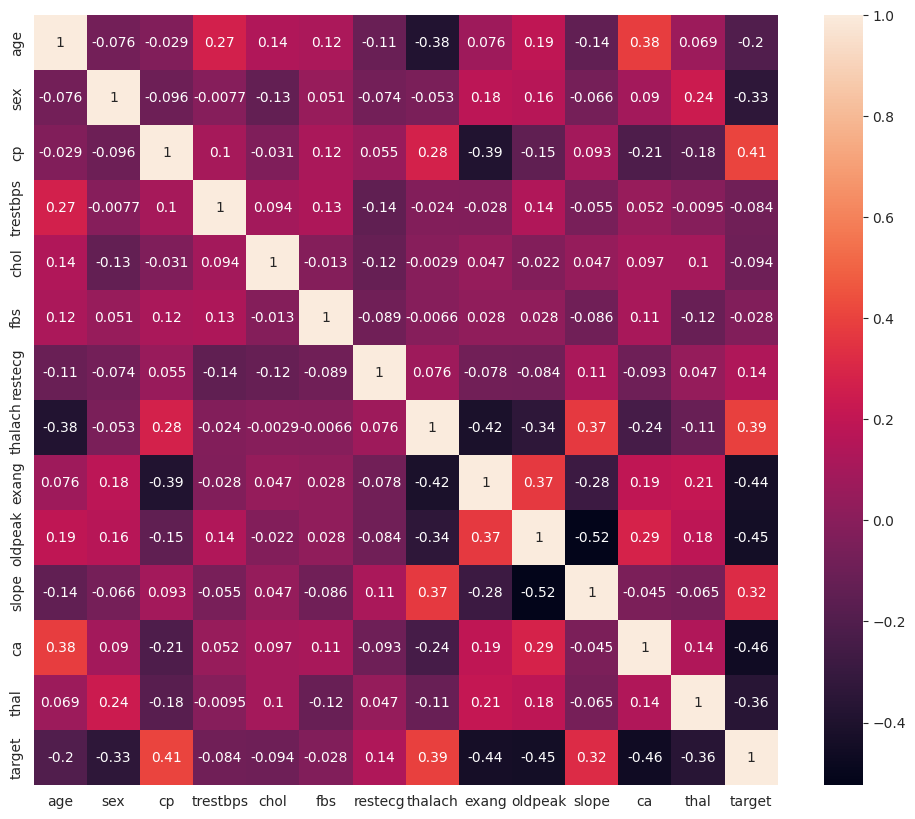

In [15]:
# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#Feature Engineering

In [16]:
# Feature engineering dengan one-hot encoding: mengubah categorical variables menjadi dummy variables
cp = pd.get_dummies(data['cp'], prefix="cp")
thal = pd.get_dummies(data['thal'], prefix="thal")
slope = pd.get_dummies(data['slope'], prefix="slope")

In [17]:
data_ = [data, cp, thal, slope]
data = pd.concat(data_, axis=1)
data = data.drop(columns=['cp', 'thal', 'slope'])
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
5,58,0,100,248,0,0,122,0,1.0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,0,...,1,0,0,0,0,1,0,0,0,1
1021,60,1,125,258,0,0,141,1,2.8,1,...,0,0,0,0,0,0,1,0,1,0
1022,47,1,110,275,0,0,118,1,1.0,1,...,0,0,0,0,0,1,0,0,1,0
1023,50,0,110,254,0,0,159,0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


#Automate EDA through Dataprep

In [18]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(data).show() 

Output hidden; open in https://colab.research.google.com to view.

Dari EDA yang telah dilakukan dapat diketahui bahwa fitur thal (detak jantung maksimum yang tercapai) dan fitur slope (kemiringan segmen ST saat puncak olahraga) merupakan fitur yang paling berpengaruh terhadap penggolongan apakah pasien memiliki penyakit jantung atau tidak (fitur target). Dan juga terlihat bahwa data imbalance dimana banyaknya pasien dengan fitur target 1 (memiliki penyakit jantung) lebih banyak dibandingkan banyaknya pasien dengan fitur target 0 (tidak memiliki penyakit jantung)

# ASSIGNMENT 3

#Hypothesis

Model yang akan digunakan untuk melakukan klasifikasi biner terkait apakah pasien memiliki/menderita penyakit jantung atau tidak, yaitu:
1. Random Forest Classifier

  Random Forest Classifier adalah salah satu algoritma supervised machine learning yang digunakan secara luas dalam klasifikasi. Model ini membangun decision trees pada sampel yang berbeda dan mengambil suara mayoritas untuk klasifikasi. Sehingga, hypothesis saat ini adalah model Random Forest Classifier dapat memprediksi pasien memiliki/menderita penyakit jantung atau tidak dengan akurasi yang baik. 
2. CatBoost Classifier

  CatBoost Classifier adalah salah satu algoritma supervised machine learning yang dapat digunakan dalam klasifikasi. Algoritma CatBoost dapat menangani missing value yang ada pada dataset, dapat melakukan label encoding secara otomatis terhadap fitur kategorikal, dan menggunakan binary symmetric decision trees. Sehingga, hypothesis saat ini adalah model CatBoost Classifier dapat memprediksi pasien memiliki/menderita penyakit jantung atau tidak dengan akurasi yang baik. 

#Modelling

Untuk dataset heart disease ini, kita akan melakukan klasifikasi biner dengan fitur target yang bernama 'target' dimana jika target = 1 maka pasien memiliki penyakit jantung sedangkan jika target = 0 maka pasien tidak memiliki penyakit jantung. Model yang saya pilih untuk klasifikasi penyakit jantung ini adalah:
1. Random Forest Classifier, karena dapat mengatasi overfitting (output didasarkan pada voting mayoritas atau rata-rata), kebal terhadap dimensi, dan sangat stabil karena diambil rata-rata jawaban yang diberikan oleh banyak pohon.
2. Catboost Classifier, karena dapat mengatasi imbalance class, dapat menangani data kategorikal dengan baik tanpa harus melakukan konversi ke numerik, dan dapat mengatasi overfitting (karena memiliki teknik pengoptimalan seperti regularisasi L1 dan L2, pengurangan dimensi, dan dropout)

In [19]:
# Memisahkan fitur target dan fitur-fitur lainnya 
X = data.drop('target', axis=1)
y = data['target']

In [20]:
from sklearn import preprocessing
# membuat objek MinMaxScaler yang bernama scaler 
scaler = preprocessing.MinMaxScaler()
# fit scaler ke features, transform features ke versi scaled
X = pd.DataFrame(scaler.fit_transform(X))

In [21]:
# Train test split
# memecah data menjadi train dan test dataset dengan rasio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# ASSIGNMENT 4

# Soal 1
Compare and contrast the several models you have created for the last assignment

Answer:
Adapun perbedaan antara ketiga model yang digunakan adalah:
1. Random Forest Classifier:
  *   Merupakan metode ensemble yang menggabungkan beberapa decision tree untuk membuat prediksi.
  *   Menggunakan pemilihan acak fitur untuk membagi setiap node, yang membantu mencegah overfitting dan meningkatkan generalisasi.
  *   Dapat menangani fitur kategorikal dan numerik.
  *   Relatif mudah digunakan dan dapat mencapai akurasi yang tinggi.

2. CatBoost Classifier:
  *  Merupakan algoritma boosting yang menggunakan decision tree untuk melakukan prediksi.
  *   Menggunakan gradient boosting dengan algoritma baru untuk meningkatkan efisiensi pelatihan dan mengurangi overfitting.
  *  Dapat menangani fitur kategorikal dengan lebih baik daripada sebagian besar algoritma lain, karena secara otomatis melakukan encoding dan menangani missing values.
  *   Memiliki built-in feature selection untuk memilih fitur yang paling relevan untuk setiap tree.

3.   Decision Tree Classifier
  *   Merupakan algoritma sederhana yang membangun sebuah decision tree berdasarkan data training.
  *   Membagi setiap node berdasarkan fitur yang memberikan information gain paling banyak.
  *   Dapat menangani fitur kategorikal dan numerik.
  *   Rentan terhadap overfitting dan mungkin membuat tree yang kompleks sehingga tidak baik generalisasinya.

Random Forest Classifier dan CatBoost Classifier adalah metode ensemble yang menggunakan decision tree, tetapi CatBoost Classifier menggunakan algoritma baru untuk meningkatkan efisiensi pelatihan dan menangani fitur kategorikal dengan lebih baik. Decision Tree Classifier adalah algoritma yang lebih sederhana yang dapat menangani fitur kategorikal dan numerik,tetapi rentan terhadap overfitting.

# Hyperparameter Tuning

In [ ]:
# Modelling, cross validation, bootstrapping untuk Model 1 (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(bootstrap=True, random_state=28)
params = [{'max_depth': list(range(10, 15)), 'max_features': ['log2', 'sqrt']}]
grid_search_cv = GridSearchCV(rfc, params, cv = 10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'max_depth': 12, 'max_features': 'log2'}
0.9929577464788732


Didapatkan best hyperparameter untuk model 1 (Random Forest Classifier) adalah {'max_depth': 12, 'max_features': 'log2'} yang menghasilkan akurasi validasi 0.9929577464788732

In [ ]:
# Modelling, cross validation, bootstrapping untuk Model 2 (Cat Boost Classifier)
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(silent=True)
params = [{'max_depth': list(range(4, 10)), 'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'], 'loss_function': ['Logloss', 'CrossEntropy']}]
grid_search_cv = GridSearchCV(cbc, params, cv = 10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'bootstrap_type': 'Bayesian', 'loss_function': 'Logloss', 'max_depth': 7}
0.995774647887324


Didapatkan best hyperparameter untuk model 2 (Cat Boost Classifier) adalah {'bootstrap_type': 'Bayesian', 'loss_function': 'Logloss', 'max_depth': 7} yang menghasilkan akurasi validasi 0.995774647887324

In [ ]:
# Modelling, cross validation, bootstrapping untuk Model 3 (Decision Tree Classifier)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=28)
params = [{'max_depth': list(range(1, 10, 2)), 'min_samples_split': list(range(10,50,20))}]
grid_search_cv = GridSearchCV(dtc, params, cv = 10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'max_depth': 9, 'min_samples_split': 10}
0.9619718309859155


Didapatkan best hyperparameter untuk model 3 (Decision Tree Classifier) adalah {'max_depth': 9, 'min_samples_split': 10} yang menghasilkan akurasi validasi 0.9619718309859155

# Prediction, Evaluation

Model evaluation yang akan digunakan yaitu:
1. Confusion Matrix: cara memvisualisasikan hasil prediksi dari algoritma klasifikasi pada Machine Learning yang membandingkan nilai prediksi hasil pemodelan dengan nilai aktual.
2. Akurasi: mengukur seberapa sering model membuat prediksi yang benar.
3. Precision: mengukur seberapa baik model mengidentifikasi positif benar (TP) diantara semua prediksi positif.
4. Recall: mengukur seberapa baik model mengidentifikasi positif benar (TP) diantara semua kasus positif yang sebenarnya.
5. F1-Score: rata-rata harmonik dari presisi dan recall, yang mencoba menemukan keseimbangan antara keduanya.

## Menggunakan Model 1 (Random Forest Classifier)

In [25]:
# Membuat model 1 (Random Forest Classifier) menggunakan best hyperparameter yang didapat sebelumnya
rfc = RandomForestClassifier(bootstrap=True, random_state=28, max_depth=12, max_features='log2')
# train model
rfc.fit(X_train, y_train)
# prediksi dengan menggunakan data test
y_pred = rfc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        96

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Text(0.5, 1.0, 'Confusion Matrix')

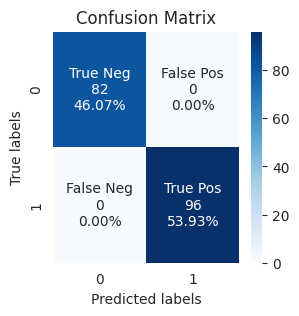

In [27]:
from sklearn.metrics import confusion_matrix
# Menampilkan confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
ax = plt.subplot()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Dari classification report diatas, terlihat bahwa akurasi model 1 (Random Forest Classifier) sebesar 100%. Selain itu, dari confusion matrix yang dihasilkan terlihat bahwa hasil prediksi True Negative 46.07% dan True Positive 53.93%

## Menggunakan Model 2 (Cat Boost Classifier)

In [28]:
# Membuat model 2 (Cat Boost Classifier) menggunakan best hyperparameter yang didapat sebelumnya
cbc = CatBoostClassifier(silent=True, bootstrap_type='Bayesian', loss_function='Logloss', max_depth=7)
# train model
cbc.fit(X_train, y_train)
# prediksi dengan menggunakan data test
y_pred = cbc.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        96

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Text(0.5, 1.0, 'Confusion Matrix')

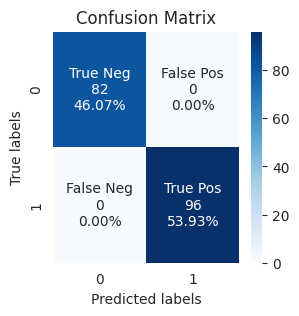

In [30]:
from sklearn.metrics import confusion_matrix
# Menampilkan confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
ax = plt.subplot()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Dari classification report diatas, terlihat bahwa akurasi model 2 (Cat Boost Classifier) sebesar 100%. Selain itu, dari confusion matrix yang dihasilkan terlihat bahwa hasil prediksi True Negative 46.07% dan True Positive 53.93%

## Menggunakan Model 3 (Decision Tree Classifier)

In [31]:
# Membuat model 3 (Decision Tree Classifier) menggunakan best hyperparameter yang didapat sebelumnya
dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=28)
# train model
dtc.fit(X_train, y_train)
# prediksi dengan menggunakan data test
y_pred = dtc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        82
           1       0.94      0.98      0.96        96

    accuracy                           0.96       178
   macro avg       0.96      0.95      0.95       178
weighted avg       0.96      0.96      0.95       178



Text(0.5, 1.0, 'Confusion Matrix')

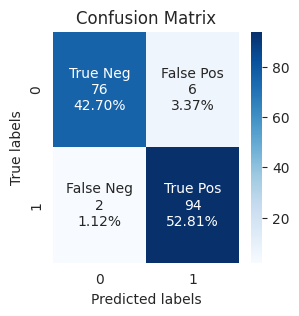

In [33]:
from sklearn.metrics import confusion_matrix
# Menampilkan confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
ax = plt.subplot()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Dari classification report diatas, terlihat bahwa akurasi model 3 (Decision Tree Classifier) sebesar 96%. Selain itu, dari confusion matrix yang dihasilkan terlihat bahwa hasil prediksi True Negative 42.70% dan True Positive 52.81%

# Learning Curves

## Model 1 (Random Forest Classifier)

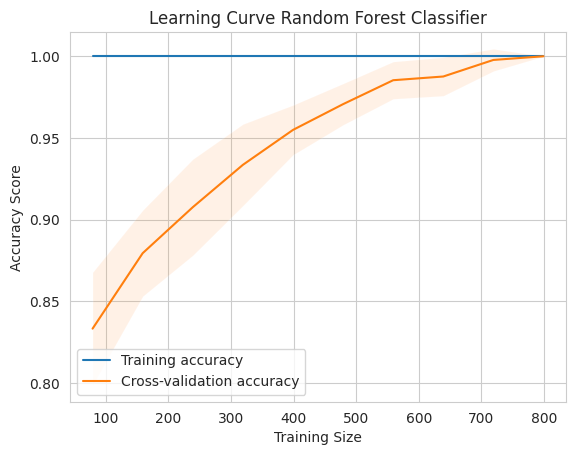

In [36]:
from sklearn.model_selection import learning_curve

# Membuat model 1 (Random Forest Classifier) menggunakan best hyperparameter yang didapat sebelumnya
rfc = RandomForestClassifier(bootstrap=True, random_state=28, max_depth=12, max_features='log2')

# Menentukan parameter learning curve
train_sizes, train_scores, test_scores = learning_curve(rfc, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Mencari rata-rata dan standar deviasi dari skor train dan test setiap ukuran data training
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Membuat plot learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')

# Menambahkan area untuk standar deviasi
plt.fill_between(train_sizes, train_mean - train_std,train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Menambahkan label dan legend pada plot
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve Random Forest Classifier')
plt.legend(loc='best')

# Menampilkan plot
plt.show()

## Model 2 (Cat Boost Classifier)

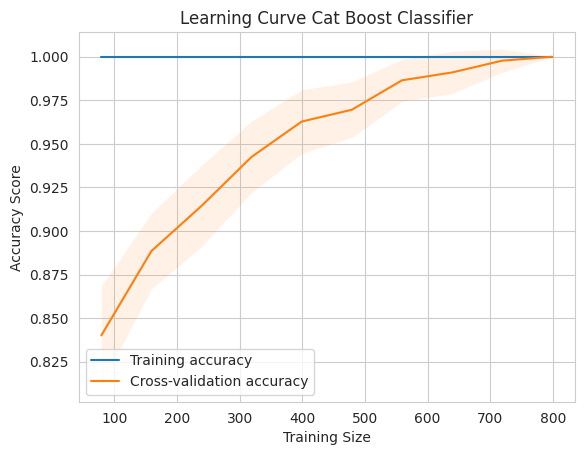

In [37]:
# Membuat model 2 (Cat Boost Classifier) menggunakan best hyperparameter yang didapat sebelumnya
cbc = CatBoostClassifier(silent=True, bootstrap_type='Bayesian', loss_function='Logloss', max_depth=7)

# Menentukan parameter learning curve
train_sizes, train_scores, test_scores = learning_curve(cbc, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Mencari rata-rata dan standar deviasi dari skor train dan test setiap ukuran data training
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Membuat plot learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')

# Menambahkan area untuk standar deviasi
plt.fill_between(train_sizes, train_mean - train_std,train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Menambahkan label dan legend pada plot
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve Cat Boost Classifier')
plt.legend(loc='best')

# Menampilkan plot
plt.show()

## Model 3 (Decision Tree Classifier)

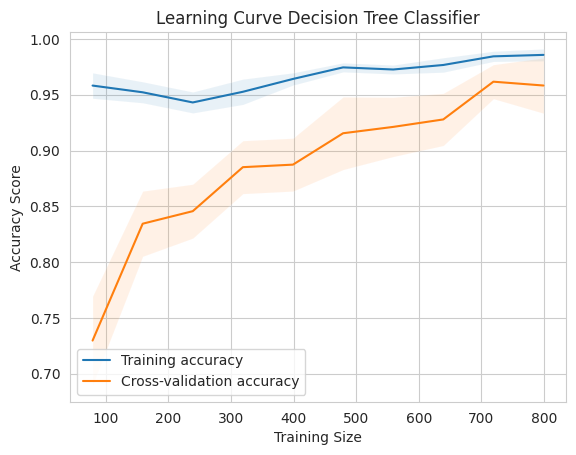

In [38]:
# Membuat model 3 (Decision Tree Classifier) menggunakan best hyperparameter yang didapat sebelumnya
dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=28)

# Menentukan parameter learning curve
train_sizes, train_scores, test_scores = learning_curve(dtc, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Mencari rata-rata dan standar deviasi dari skor train dan test setiap ukuran data training
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Membuat plot learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')

# Menambahkan area untuk standar deviasi
plt.fill_between(train_sizes, train_mean - train_std,train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Menambahkan label dan legend pada plot
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve Decision Tree Classifier')
plt.legend(loc='best')

# Menampilkan plot
plt.show()

Dari learning curves yang dihasilkan untuk ketiga model diatas, terlihat bahwa performansi model (dari segi akurasi) random forest classifier dan cat boost classifier lebih baik dibandingkan decision tree classifier. Hal ini terjadi baik dalam proses training maupun saat cross validation.

# ROC Curves

## Model 1 (Random Forest Classifier)

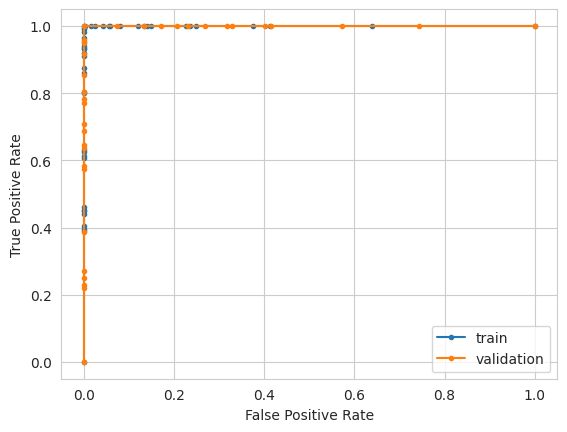

In [40]:
from sklearn.metrics import roc_curve
# Membuat model 1 (Random Forest Classifier) menggunakan best hyperparameter yang didapat sebelumnya
rfc = RandomForestClassifier(bootstrap=True, random_state=28, max_depth=12, max_features='log2')
# train model
rfc.fit(X_train, y_train)

# Membuat roc curve
train_probs = rfc.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = rfc.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Model 2 (Cat Boost Classifier)

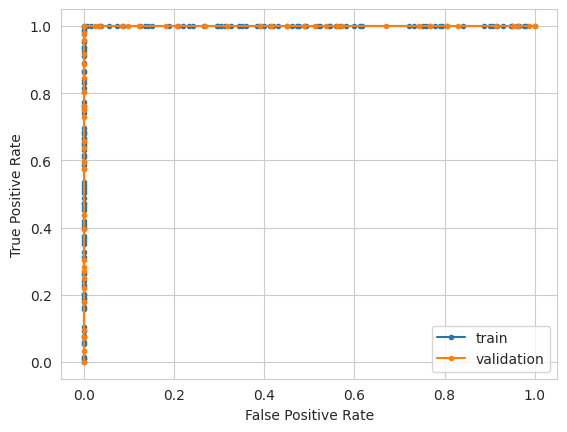

In [41]:
# Membuat model 2 (Cat Boost Classifier) menggunakan best hyperparameter yang didapat sebelumnya
cbc = CatBoostClassifier(silent=True, bootstrap_type='Bayesian', loss_function='Logloss', max_depth=7)
# train model
cbc.fit(X_train, y_train)

# Membuat roc curve
train_probs = cbc.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = cbc.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Model 3 (Decision Tree Classifier)

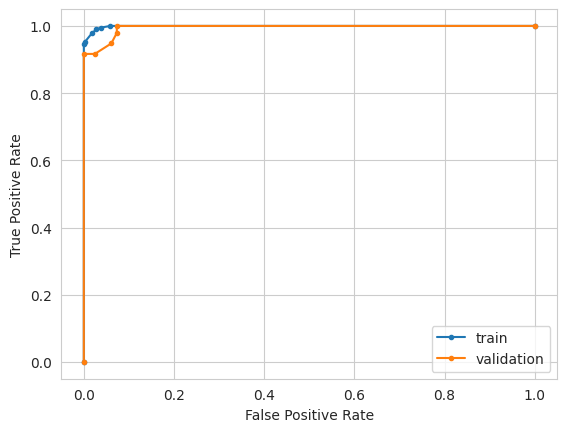

In [42]:
# Membuat model 3 (Decision Tree Classifier) menggunakan best hyperparameter yang didapat sebelumnya
dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=28)
# train model
dtc.fit(X_train, y_train)

# Membuat roc curve
train_probs = dtc.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = dtc.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Analisa Hasil:

Dalam kasus ini, ROC curve yang dihasilkan menunjukkan seberapa baik model dalam membedakan antara pasien yang terkena penyakit jantung (kelas positif / target class 1) dan pasien yang tidak terkena penyakit jantung (kelas negatif / target class 0) pada data test. Semakin dekat kurva ROC ke titik (0,1), semakin baik model dalam membedakan antara kelas positif dan negatif. Maka dari itu, terlihat dari kurva ROC yang dihasilkan oleh model 1 (Random Forest Classifier) dan model 2 (Cat Boost Classifier) yang dekat dengan titik (0,1) maka kedua model tersebut lebih baik dalam membedakan antara kelas positif dan kelas negatif daripada model 3 (Decision Tree Classifier).

# Best Model

Dari hasil evaluasi ketiga model diatas terlihat bahwa ketiganya memiliki performansi yang baik pada kasus ini terutama untuk model random forest classifier dan cat boost classifier yang menghasilkan akurasi 100%, serta precision, recall, dan F1-Score 1.00. Kedua model telah berhasil memprediksi fitur target dengan benar (sesuai dengan nilai aktual). Model decision tree classifier juga memiliki performansi yang baik dimana model ini menghasilkan akurasi 96%. 

Dengan demikian, untuk kasus ini, model yang memiliki performansi terbaik adalah model 1 (Random Forest Classifier) dan model 2 (Cat Boost Classifier).